# Data Preprocessing

In [1]:
# Import machine learning modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create SQLAlchemy engine for SQLite
engine = create_engine('sqlite:///Data/dementia_data.db')

# Retrieve data from SQLite Database
query = "SELECT * FROM dementia_data"
df = pd.read_sql(query, con=engine)

# Display DataFrame
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,None,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,None,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [3]:
# Impute 'Dosage in mg' with zero
df['Dosage in mg'] = df['Dosage in mg'].fillna(0)

# Fill missing 'Prescription' values with 'None'
df['Prescription'].fillna('None', inplace=True)
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,None,0.0,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,None,0.0,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [4]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

df_encoded.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,...,Medication_History_No,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,0.0,60,10,...,True,False,False,True,False,False,True,True,False,False
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,12.0,61,1,...,False,True,False,True,False,False,True,False,True,False
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,0.0,69,8,...,True,False,False,False,True,False,True,False,True,False
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,23.0,78,5,...,False,True,True,False,False,False,True,False,False,True
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,20.0,77,0,...,False,True,False,True,False,True,False,True,False,False


In [5]:
# Define target variable
target = "Dementia"

# Split the dataframe into features and target
X = df_encoded.drop(columns=[target])  # Features
y = df_encoded[target]  # Target

In [6]:
# Stratified split into a training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48, stratify=y)

In [7]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Training The Random Forest Model

In [8]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=48)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=48)

In [9]:
# Make predictions using testing data
y_pred = rf_model.predict(X_test_scaled)

# Model Evaluation

In [10]:
# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(
    conf_matrix, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

#classification report
class_report = classification_report(y_test, y_pred)

# Displaying results
print("Confusion Matrix:")
print(conf_matrix_df)
print("\nAccuracy Score:", acc_score)

Confusion Matrix:
            Predicted No  Predicted Yes
Actual No            129              0
Actual Yes             0            121

Accuracy Score: 1.0


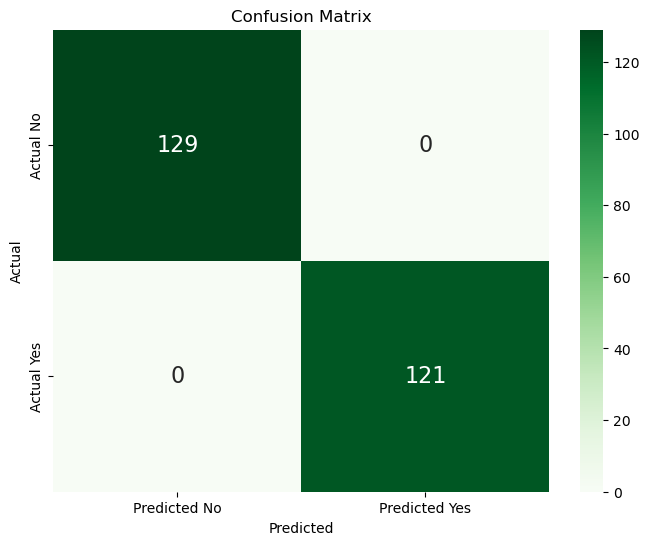

In [11]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Greens", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Print classification report
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



# Feature Importance

In [13]:
# Extract feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
feature_importance_df

,Feature,Importance
13,Prescription_None,0.317741
9,Cognitive_Test_Scores,0.271577
7,Dosage in mg,0.215594
33,Depression_Status_No,0.047734
34,Depression_Status_Yes,0.043856
28,APOE_ε4_Negative,0.020965
11,Prescription_Galantamine,0.020038
14,Prescription_Rivastigmine,0.014388
12,Prescription_Memantine,0.013713
10,Prescription_Donepezil,0.009260


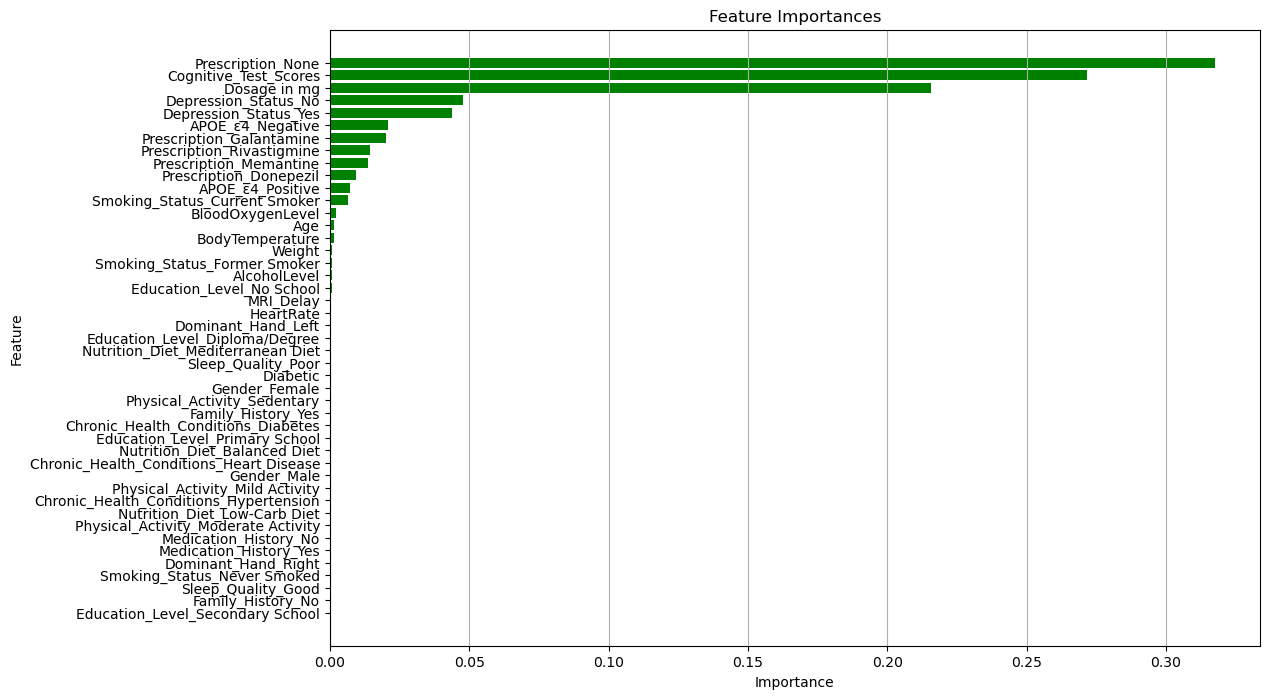

In [14]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='-')
plt.show()